In [3]:
import networkx as nx
import matplotlib.pyplot as plt

print("="*70)
print("AĞ TOPOLOJİLERİ ANALİZİ")
print("="*70)

AĞ TOPOLOJİLERİ ANALİZİ



1. BUS TOPOLOJİSİ
--------------------------------------------------
İSİM KÖKENİ: Otobüs gibi tek bir ana yol (backbone) üzerinde
             duraklar (cihazlar) vardır.

NASIL ÇALIŞIR:
- Tüm cihazlar tek bir ana kabloya bağlanır
- Veri tüm cihazlara gider ama sadece hedef cihaz alır
- Her iki uçta sonlandırıcı (terminator) vardır

AVANTAJLARI: Ucuz, kolay kurulum, az kablo
DEZAVANTAJLARI: Ana kablo bozulursa tüm ağ çöker


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_19412\1591009695.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


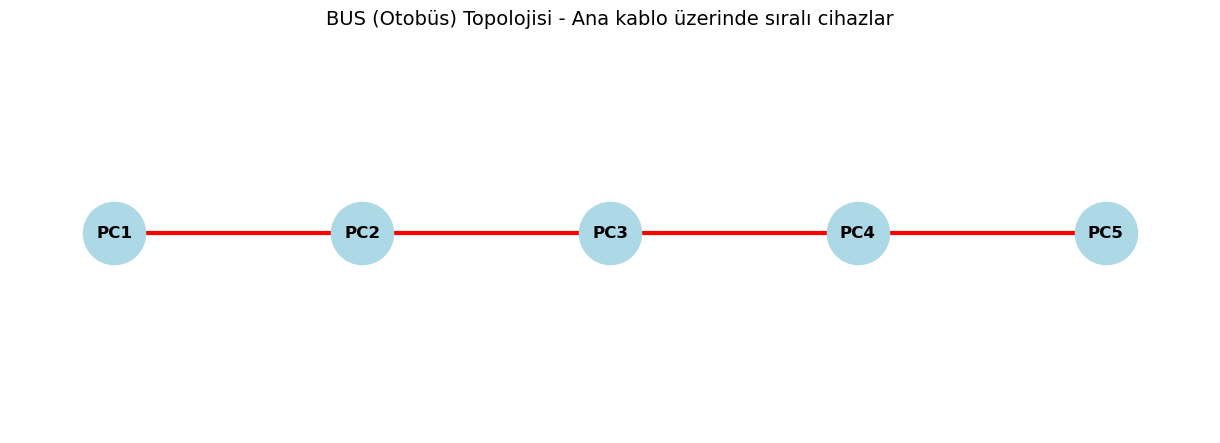

In [5]:
print("\n1. BUS TOPOLOJİSİ")
print("-" * 50)
print("İSİM KÖKENİ: Otobüs gibi tek bir ana yol (backbone) üzerinde")
print("             duraklar (cihazlar) vardır.")
print("\nNASIL ÇALIŞIR:")
print("- Tüm cihazlar tek bir ana kabloya bağlanır")
print("- Veri tüm cihazlara gider ama sadece hedef cihaz alır")
print("- Her iki uçta sonlandırıcı (terminator) vardır")
print("\nAVANTAJLARI: Ucuz, kolay kurulum, az kablo")
print("DEZAVANTAJLARI: Ana kablo bozulursa tüm ağ çöker")

# Bus topolojisi - düz bir çizgi üzerinde düğümler
BUS = nx.Graph()
nodes = ["PC1", "PC2", "PC3", "PC4", "PC5"]
BUS.add_nodes_from(nodes)
# Ana hat üzerinde sıralı bağlantılar
edges = [("PC1", "PC2"), ("PC2", "PC3"), ("PC3", "PC4"), ("PC4", "PC5")]
BUS.add_edges_from(edges)

# Düz çizgi pozisyonu
pos_bus = {node: (i, 0) for i, node in enumerate(nodes)}

plt.figure(figsize=(12, 4))
nx.draw(BUS, pos=pos_bus, with_labels=True, node_color="lightblue", 
        node_size=2000, font_size=12, font_weight="bold", edge_color="red", width=3)
plt.title("BUS (Otobüs) Topolojisi - Ana kablo üzerinde sıralı cihazlar", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


2. STAR TOPOLOJİSİ
--------------------------------------------------
İSİM KÖKENİ: Merkezi hub etrafındaki bağlantılar
             yıldız şekli oluşturur.

NASIL ÇALIŞIR:
- Her cihaz merkezi hub/switch'e ayrı kablo ile bağlanır
- Tüm iletişim merkezi hub üzerinden geçer
- En yaygın kullanılan topolojidir (Ethernet)

AVANTAJLARI: Kolay yönetim, bir cihaz bozulsa diğerleri etkilenmez
DEZAVANTAJLARI: Merkezi hub bozulursa tüm ağ çöker


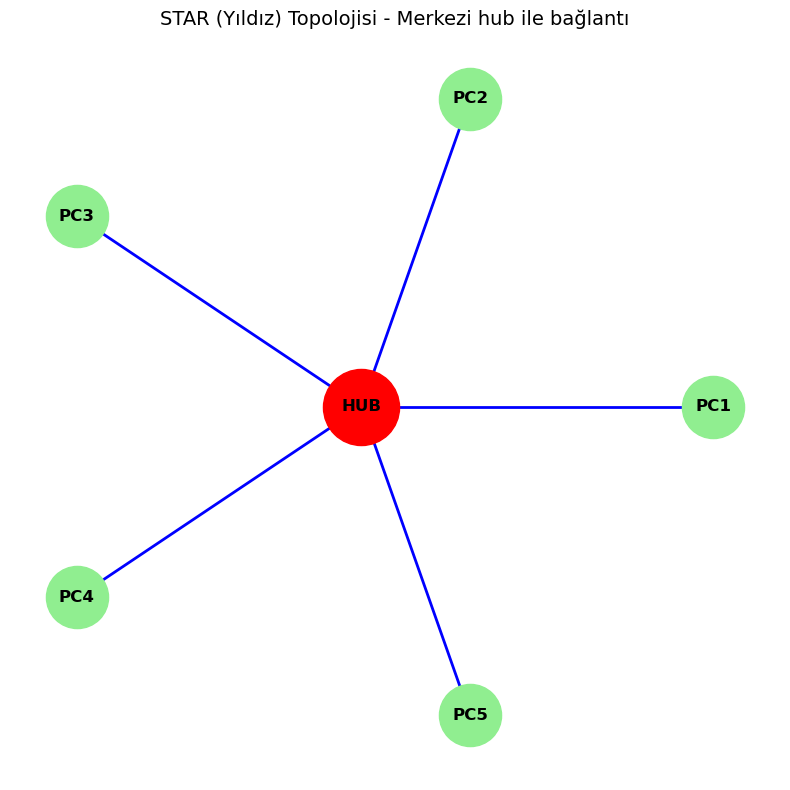

In [7]:
print("\n2. STAR TOPOLOJİSİ")
print("-" * 50)
print("İSİM KÖKENİ: Merkezi hub etrafındaki bağlantılar")
print("             yıldız şekli oluşturur.")
print("\nNASIL ÇALIŞIR:")
print("- Her cihaz merkezi hub/switch'e ayrı kablo ile bağlanır")
print("- Tüm iletişim merkezi hub üzerinden geçer")
print("- En yaygın kullanılan topolojidir (Ethernet)")
print("\nAVANTAJLARI: Kolay yönetim, bir cihaz bozulsa diğerleri etkilenmez")
print("DEZAVANTAJLARI: Merkezi hub bozulursa tüm ağ çöker")

STAR = nx.star_graph(5)  # Merkez + 5 düğüm = 6 toplam
# Düğümleri yeniden adlandır
mapping = {0: "HUB", 1: "PC1", 2: "PC2", 3: "PC3", 4: "PC4", 5: "PC5"}
STAR = nx.relabel_nodes(STAR, mapping)

plt.figure(figsize=(8, 8))
pos_star = nx.spring_layout(STAR, k=2, iterations=50)
# Hub'ı merkeze yerleştir
pos_star["HUB"] = (0, 0)
angle_step = 360 / 5
import math
for i, node in enumerate(["PC1", "PC2", "PC3", "PC4", "PC5"]):
    angle = math.radians(i * angle_step)
    pos_star[node] = (math.cos(angle) * 2, math.sin(angle) * 2)

nx.draw_networkx_nodes(STAR, pos_star, nodelist=["HUB"], node_color="red", 
                       node_size=3000, label="Hub/Switch")
nx.draw_networkx_nodes(STAR, pos_star, nodelist=["PC1", "PC2", "PC3", "PC4", "PC5"], 
                       node_color="lightgreen", node_size=2000)
nx.draw_networkx_labels(STAR, pos_star, font_size=12, font_weight="bold")
nx.draw_networkx_edges(STAR, pos_star, width=2, edge_color="blue")
plt.title("STAR (Yıldız) Topolojisi - Merkezi hub ile bağlantı", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


3. RING (HALKA) TOPOLOJİSİ
----------------------------------------
Tanım: Her cihaz sağındaki ve solundaki cihaza bağlanır, son cihaz ilk cihaza bağlanır.
İsim Kökeni: Cihazlar halka şeklinde birbirine bağlanır.
Avantajlar: Veri çarpışması az, adil ağ erişimi
Dezavantajlar: Bir cihaz bozulursa tüm ağ etkilenir


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_19412\3669849471.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


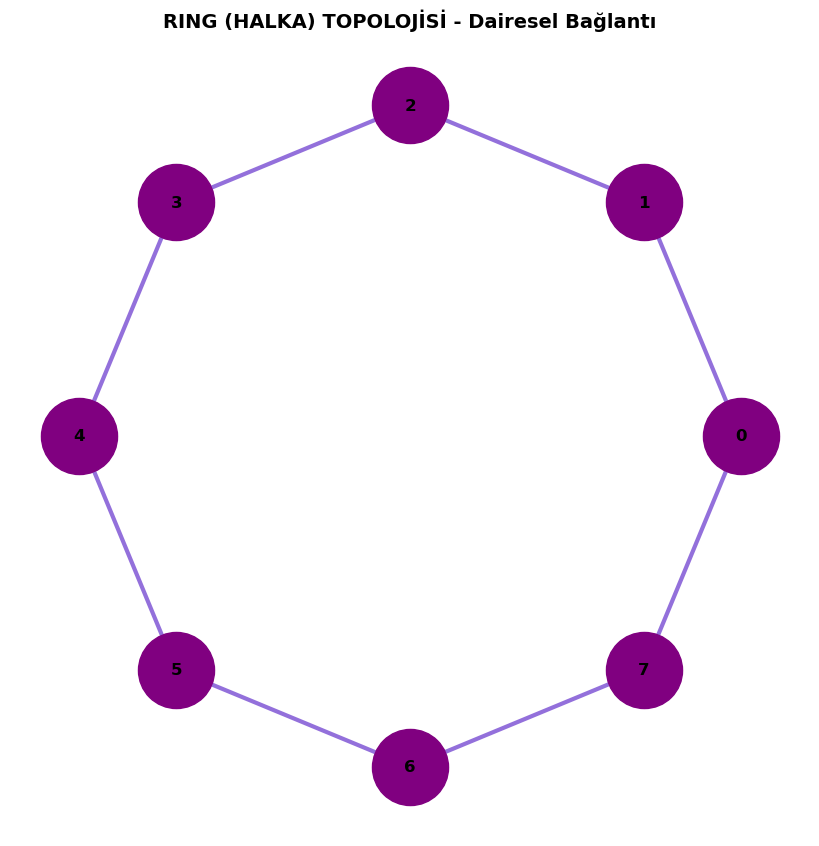

In [9]:
print("\n3. RING (HALKA) TOPOLOJİSİ")
print("-" * 40)
print("Tanım: Her cihaz sağındaki ve solundaki cihaza bağlanır, son cihaz ilk cihaza bağlanır.")
print("İsim Kökeni: Cihazlar halka şeklinde birbirine bağlanır.")
print("Avantajlar: Veri çarpışması az, adil ağ erişimi")
print("Dezavantajlar: Bir cihaz bozulursa tüm ağ etkilenir")

Ring = nx.cycle_graph(8)  # 8 düğümlü halka
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(Ring)  # Dairesel düzenleme
nx.draw(Ring, pos=pos, with_labels=True, node_color="purple", 
        node_size=3000, font_size=12, font_weight="bold", 
        edge_color="mediumpurple", width=3)
plt.title("RING (HALKA) TOPOLOJİSİ - Dairesel Bağlantı", fontsize=14, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()


4. MESH (AĞ/ÖRGÜ) TOPOLOJİSİ
----------------------------------------
Tanım: Her cihaz diğer tüm cihazlara bağlıdır (Full Mesh).
İsim Kökeni: Balık ağı gibi, her düğüm birbirine bağlıdır.
Avantajlar: Çok güvenilir, bir yol bozulsa alternatif yollar var
Dezavantajlar: Çok pahalı, karmaşık kurulum, çok fazla kablo


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_19412\1068354979.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


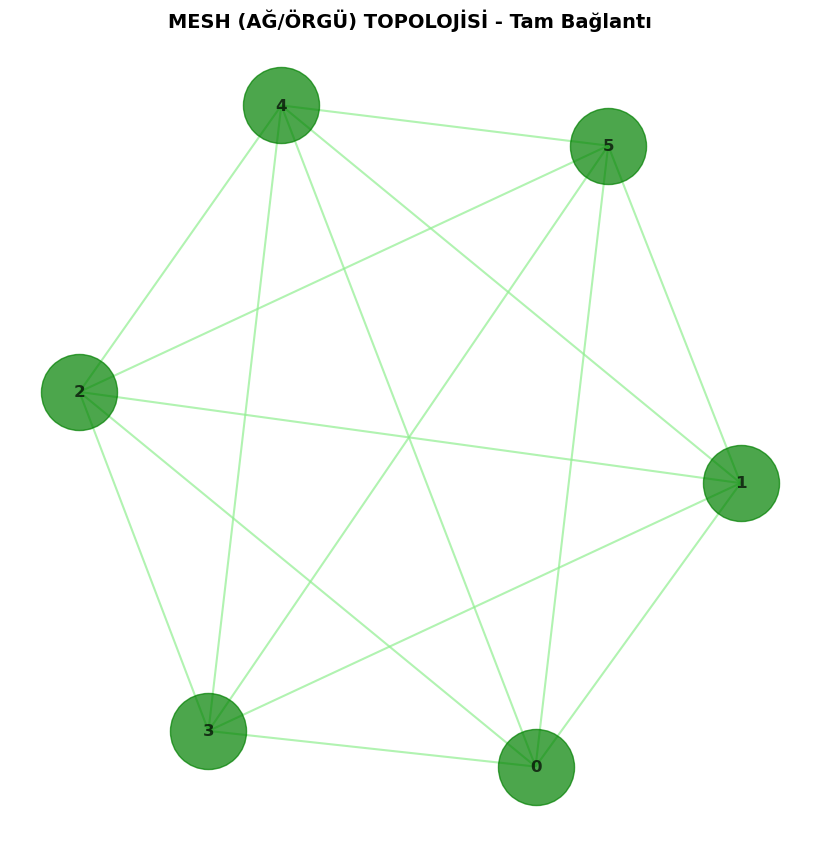

In [11]:
print("\n4. MESH (AĞ/ÖRGÜ) TOPOLOJİSİ")
print("-" * 40)
print("Tanım: Her cihaz diğer tüm cihazlara bağlıdır (Full Mesh).")
print("İsim Kökeni: Balık ağı gibi, her düğüm birbirine bağlıdır.")
print("Avantajlar: Çok güvenilir, bir yol bozulsa alternatif yollar var")
print("Dezavantajlar: Çok pahalı, karmaşık kurulum, çok fazla kablo")

Mesh = nx.complete_graph(6)  # 6 düğümlü tam bağlantılı graf
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(Mesh, k=0.5, iterations=50)
nx.draw(Mesh, pos=pos, with_labels=True, node_color="green", 
        node_size=3000, font_size=12, font_weight="bold", 
        edge_color="lightgreen", width=1.5, alpha=0.7)
plt.title("MESH (AĞ/ÖRGÜ) TOPOLOJİSİ - Tam Bağlantı", fontsize=14, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()


5. TREE (AĞAÇ) TOPOLOJİSİ
----------------------------------------
Tanım: Hiyerarşik yapı. Ana kök (root) ve dallar (branches) vardır.
İsim Kökeni: Ağaç yapısı gibi kök ve dallardan oluşur.
Avantajlar: Kolay genişleme, hiyerarşik yönetim
Dezavantajlar: Ana kök bozulursa büyük bölüm etkilenir


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_19412\2380490683.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


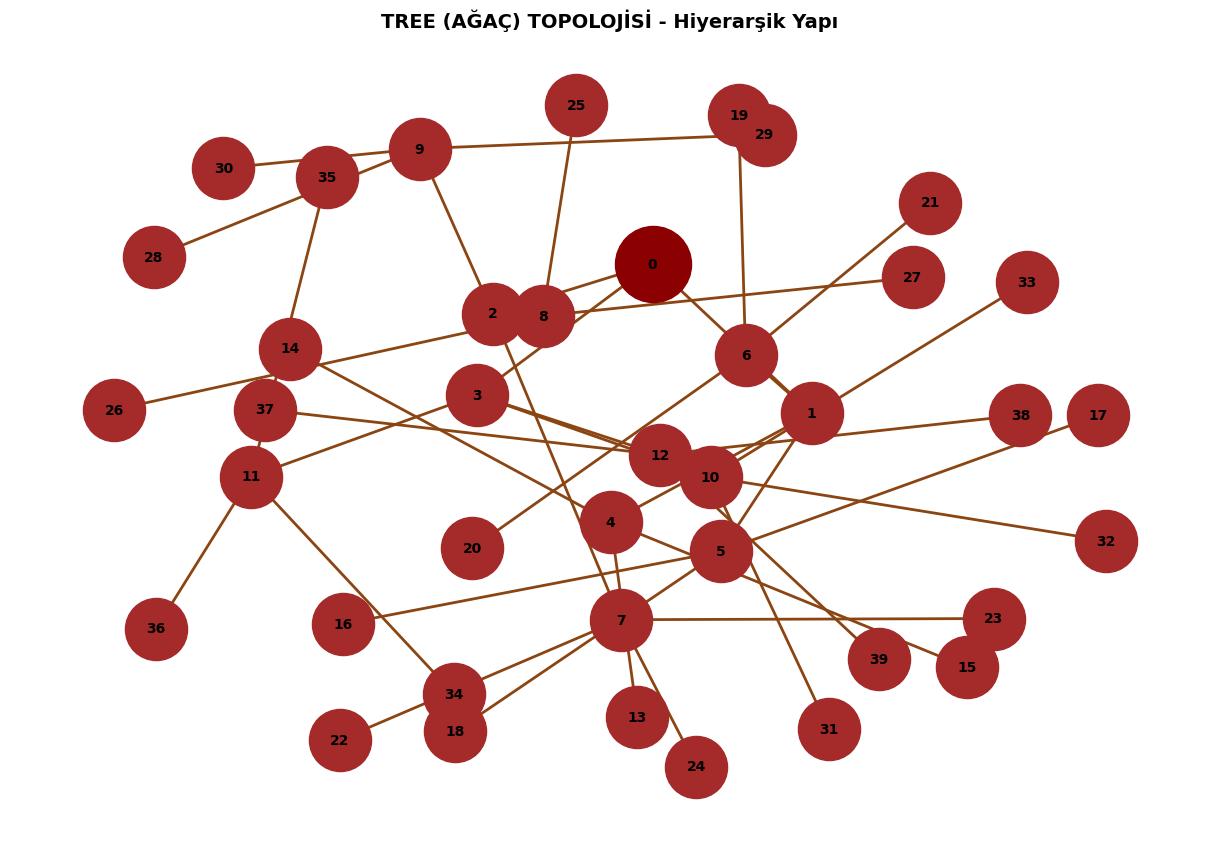

In [13]:
print("\n5. TREE (AĞAÇ) TOPOLOJİSİ")
print("-" * 40)
print("Tanım: Hiyerarşik yapı. Ana kök (root) ve dallar (branches) vardır.")
print("İsim Kökeni: Ağaç yapısı gibi kök ve dallardan oluşur.")
print("Avantajlar: Kolay genişleme, hiyerarşik yönetim")
print("Dezavantajlar: Ana kök bozulursa büyük bölüm etkilenir")

Tree = nx.balanced_tree(r=3, h=3)  # 3 dallı, 3 seviye derinliğinde ağaç
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(Tree, k=0.8, iterations=50)
nx.draw(Tree, pos=pos, with_labels=True, node_color="brown", 
        node_size=2000, font_size=10, font_weight="bold", 
        edge_color="saddlebrown", width=2)
# Kök düğümü vurgula
nx.draw_networkx_nodes(Tree, pos=pos, nodelist=[0], node_color="darkred", node_size=3000)
plt.title("TREE (AĞAÇ) TOPOLOJİSİ - Hiyerarşik Yapı", fontsize=14, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()


6. HYBRID (HİBRİT/MELEZ) TOPOLOJİSİ
----------------------------------------
Tanım: İki veya daha fazla topolojinin kombinasyonu.
İsim Kökeni: 'Hybrid' = Melez, karma, karışım anlamına gelir.
Avantajlar: Esnek, ihtiyaca göre tasarlanabilir
Dezavantajlar: Karmaşık tasarım, yönetimi zor


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_19412\1730619347.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


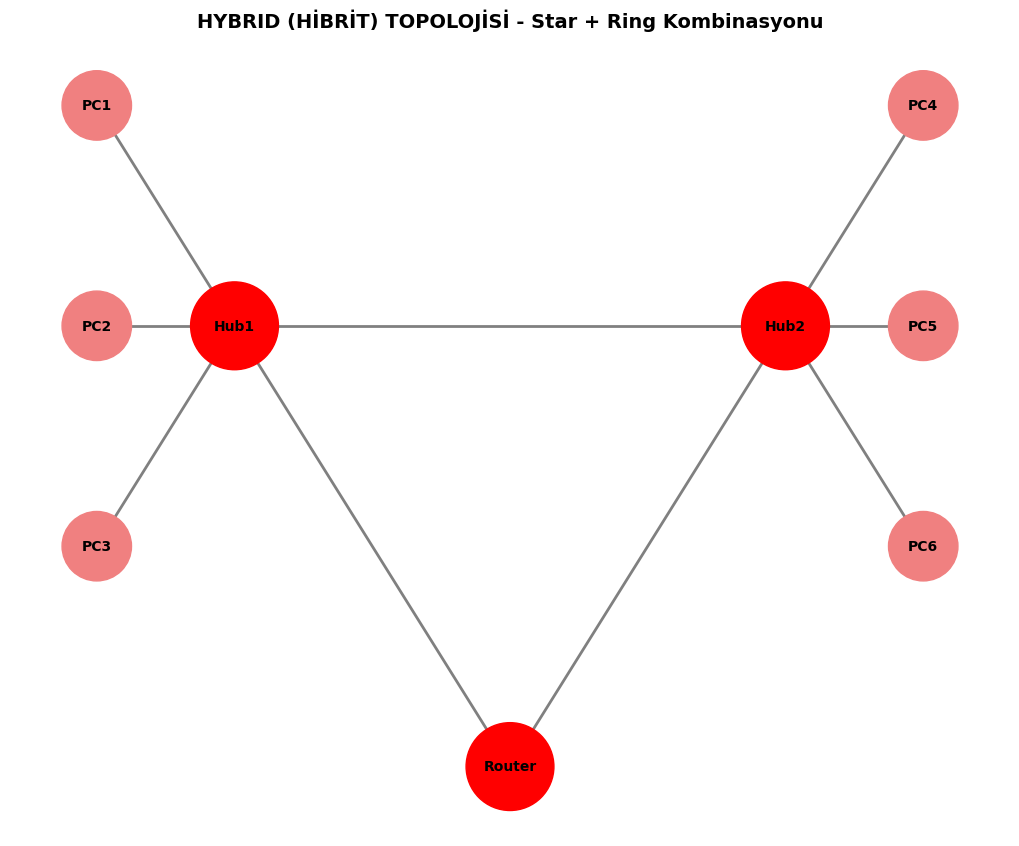

In [15]:
print("\n6. HYBRID (HİBRİT/MELEZ) TOPOLOJİSİ")
print("-" * 40)
print("Tanım: İki veya daha fazla topolojinin kombinasyonu.")
print("İsim Kökeni: 'Hybrid' = Melez, karma, karışım anlamına gelir.")
print("Avantajlar: Esnek, ihtiyaca göre tasarlanabilir")
print("Dezavantajlar: Karmaşık tasarım, yönetimi zor")

# Star + Ring kombinasyonu
Hybrid = nx.Graph()
# İlk star grubu
Hybrid.add_edges_from([("Hub1", "PC1"), ("Hub1", "PC2"), ("Hub1", "PC3")])
# İkinci star grubu
Hybrid.add_edges_from([("Hub2", "PC4"), ("Hub2", "PC5"), ("Hub2", "PC6")])
# Ring bağlantısı (hub'ları birbirine bağla)
Hybrid.add_edges_from([("Hub1", "Hub2"), ("Hub2", "Router"), ("Router", "Hub1")])

plt.figure(figsize=(10, 8))
pos = {"Hub1": (-2, 0), "PC1": (-3, 1), "PC2": (-3, 0), "PC3": (-3, -1),
       "Hub2": (2, 0), "PC4": (3, 1), "PC5": (3, 0), "PC6": (3, -1),
       "Router": (0, -2)}
       
colors = ["red" if "Hub" in n or "Router" in n else "lightcoral" for n in Hybrid.nodes()]
sizes = [4000 if "Hub" in n or "Router" in n else 2500 for n in Hybrid.nodes()]

nx.draw(Hybrid, pos=pos, with_labels=True, node_color=colors, 
        node_size=sizes, font_size=10, font_weight="bold", 
        edge_color="gray", width=2)
plt.title("HYBRID (HİBRİT) TOPOLOJİSİ - Star + Ring Kombinasyonu", fontsize=14, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()


7. BONUS: POINT-TO-POINT (NOKTA-NOKTA) TOPOLOJİSİ
----------------------------------------
Tanım: İki cihazın doğrudan birbirine bağlanması.
İsim Kökeni: Bir noktadan diğer noktaya direkt bağlantı.
Avantajlar: En basit, en hızlı, en güvenilir
Dezavantajlar: Sadece 2 cihaz için kullanılabilir


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_19412\2224447105.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


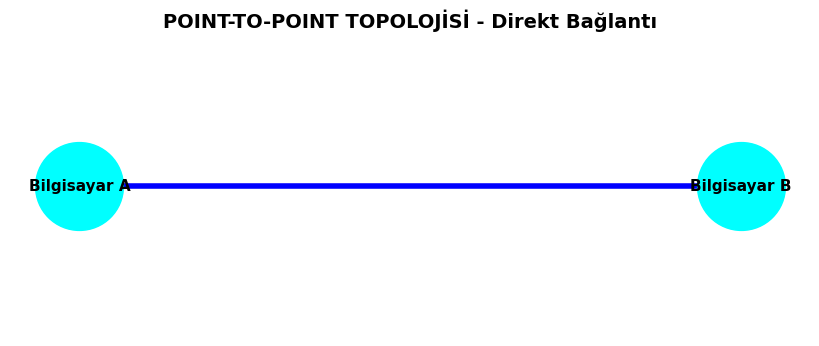

In [17]:
print("\n7. BONUS: POINT-TO-POINT (NOKTA-NOKTA) TOPOLOJİSİ")
print("-" * 40)
print("Tanım: İki cihazın doğrudan birbirine bağlanması.")
print("İsim Kökeni: Bir noktadan diğer noktaya direkt bağlantı.")
print("Avantajlar: En basit, en hızlı, en güvenilir")
print("Dezavantajlar: Sadece 2 cihaz için kullanılabilir")

P2P = nx.Graph()
P2P.add_edge("Bilgisayar A", "Bilgisayar B")

plt.figure(figsize=(8, 3))
pos = {"Bilgisayar A": (0, 0), "Bilgisayar B": (4, 0)}
nx.draw(P2P, pos=pos, with_labels=True, node_color="cyan", 
        node_size=4000, font_size=11, font_weight="bold", 
        edge_color="blue", width=4)
plt.title("POINT-TO-POINT TOPOLOJİSİ - Direkt Bağlantı", fontsize=14, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
print("\n" + "=" * 80)
print("TOPOLOJİ İSİMLERİNİN KÖKENİ - ÖZET")
print("=" * 80)
print("""
1. BUS (Otobüs)      → Tek bir ana yol, duraklar gibi cihazlar
2. STAR (Yıldız)     → Merkez etrafında yıldız şekli
3. RING (Halka)      → Son düğüm ilk düğüme bağlanır, halka oluşur
4. MESH (Ağ/Örgü)    → Balık ağı gibi her şey birbirine bağlı
5. TREE (Ağaç)       → Kök ve dallardan oluşan hiyerarşik yapı
6. HYBRID (Hibrit)   → Hybrid = Melez, farklı topolojilerin karışımı
7. P2P (Nokta-Nokta) → Bir noktadan diğerine direkt bağlantı
""")

print("=" * 80)
print("KARŞILAŞTIRMA")
print("=" * 80)
print(f"{'Topoloji':<15} {'Güvenilirlik':<15} {'Maliyet':<15} {'Kurulum':<15}")
print("-" * 60)
print(f"{'Bus':<15} {'Düşük':<15} {'Çok Ucuz':<15} {'Çok Kolay':<15}")
print(f"{'Star':<15} {'Orta':<15} {'Orta':<15} {'Kolay':<15}")
print(f"{'Ring':<15} {'Orta':<15} {'Orta':<15} {'Orta':<15}")
print(f"{'Mesh':<15} {'Çok Yüksek':<15} {'Çok Pahalı':<15} {'Çok Zor':<15}")
print(f"{'Tree':<15} {'Orta':<15} {'Orta-Yüksek':<15} {'Orta':<15}")
print(f"{'Hybrid':<15} {'Değişken':<15} {'Değişken':<15} {'Karmaşık':<15}")
print("=" * 80)


TOPOLOJİ İSİMLERİNİN KÖKENİ - ÖZET

1. BUS (Otobüs)      → Tek bir ana yol, duraklar gibi cihazlar
2. STAR (Yıldız)     → Merkez etrafında yıldız şekli
3. RING (Halka)      → Son düğüm ilk düğüme bağlanır, halka oluşur
4. MESH (Ağ/Örgü)    → Balık ağı gibi her şey birbirine bağlı
5. TREE (Ağaç)       → Kök ve dallardan oluşan hiyerarşik yapı
6. HYBRID (Hibrit)   → Hybrid = Melez, farklı topolojilerin karışımı
7. P2P (Nokta-Nokta) → Bir noktadan diğerine direkt bağlantı

KARŞILAŞTIRMA
Topoloji        Güvenilirlik    Maliyet         Kurulum        
------------------------------------------------------------
Bus             Düşük           Çok Ucuz        Çok Kolay      
Star            Orta            Orta            Kolay          
Ring            Orta            Orta            Orta           
Mesh            Çok Yüksek      Çok Pahalı      Çok Zor        
Tree            Orta            Orta-Yüksek     Orta           
Hybrid          Değişken        Değişken        Karmaşık       
